In [2]:
%matplotlib inline
# from sklearn.ensemble import RandomForestClassifier
# import optuna
import xgboost as xgb
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
from astropy.table import Table
from astropy.io import fits

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score, 
    accuracy_score, 
    precision_score,
    recall_score,
    matthews_corrcoef,
    )

# Step 1. EXTRAGAL VS STAR

In [2]:
binary1 = pd.read_csv("trainingset_binary_test6.csv")
features = ['iz','zy','yj','jh','hk','iw1','zw1','yw1','jw1','hw1','kw1','w1w2']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['EXTRAGAL','STAR'])  
X = binary1[features].values
y = le.transform(binary1['class'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8888)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8888)

In [4]:
X_train.shape

(567156, 12)

In [5]:
X_test.shape

(141789, 12)

In [6]:
y  # extragal:0, star:1

array([0, 0, 0, ..., 1, 1, 1])

# Train model using XGBoost optuna CV-best parameters

## 1. Train the model with and without optuna hyperparams

In [7]:
# 5-fold, optuna, 500 trials

# Params: 
#     lambda: 2.9077613895719
#     alpha: 1.5263290780459133
#     max_depth: 9
#     eta: 0.3
#     gamma: 1.0003397864024768
#     grow_policy: depthwise
#     min_child_weight: 4
#     subsample: 0.9129317176922225
#     colsample_bytree: 0.9886871929591262
#     max_delta_step: 6
        
param = {
     'verbosity': 1,
     'booster': 'gbtree',
     'tree_method': 'hist',
     'lambda': 2.9077613895719,
     'alpha': 1.5263290780459133,
     'max_depth': 9,
     #'eta': 0.3,  eta要手动调整 
     'gamma': 1.0003397864024768, 
     'grow_policy': 'depthwise', 
     'min_child_weight': 4, 
     'subsample': 0.91293171769222259, 
     'colsample_bytree': 0.9886871929591262, 
     'max_delta_step': 6,
     'random_state': 8888,
     # 'n_jobs': 40 
 }


In [8]:
clf_default = xgb.XGBClassifier(objective='binary:logistic', 
                         n_estimators=1000,eta=0.05
                       )

In [9]:
clf_default.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_test, y_test)])

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.64468
[1]	validation_0-logloss:0.60083
[2]	validation_0-logloss:0.56093
[3]	validation_0-logloss:0.52452
[4]	validation_0-logloss:0.49116
[5]	validation_0-logloss:0.46052
[6]	validation_0-logloss:0.43225
[7]	validation_0-logloss:0.40613
[8]	validation_0-logloss:0.38193
[9]	validation_0-logloss:0.35949
[10]	validation_0-logloss:0.33863
[11]	validation_0-logloss:0.31921
[12]	validation_0-logloss:0.30109
[13]	validation_0-logloss:0.28419
[14]	validation_0-logloss:0.26838
[15]	validation_0-logloss:0.25358
[16]	validation_0-logloss:0.23970
[17]	validation_0-logloss:0.22669
[18]	validation_0-logloss:0.21449
[19]	validation_0-logloss:0.20304
[20]	validation_0-logloss:0.19228
[21]	validation_0-logloss:0.18217
[22]	validation_0-logloss:0.17264
[23]	validation_0-logloss:0.16365
[24]	validation_0-logloss:0.15519
[25]	validation_0-logloss:0.14720
[26]	validation_0-logloss:0.13966
[27]	validation_0-logloss:0.13255
[28]	validation_0-logloss:0.12583
[29]	validation_0-loglos

[238]	validation_0-logloss:0.00326
[239]	validation_0-logloss:0.00326
[240]	validation_0-logloss:0.00326
[241]	validation_0-logloss:0.00326
[242]	validation_0-logloss:0.00326
[243]	validation_0-logloss:0.00325
[244]	validation_0-logloss:0.00325
[245]	validation_0-logloss:0.00324
[246]	validation_0-logloss:0.00323
[247]	validation_0-logloss:0.00323
[248]	validation_0-logloss:0.00322
[249]	validation_0-logloss:0.00321
[250]	validation_0-logloss:0.00320
[251]	validation_0-logloss:0.00320
[252]	validation_0-logloss:0.00319
[253]	validation_0-logloss:0.00319
[254]	validation_0-logloss:0.00319
[255]	validation_0-logloss:0.00319
[256]	validation_0-logloss:0.00318
[257]	validation_0-logloss:0.00318
[258]	validation_0-logloss:0.00318
[259]	validation_0-logloss:0.00317
[260]	validation_0-logloss:0.00317
[261]	validation_0-logloss:0.00317
[262]	validation_0-logloss:0.00316
[263]	validation_0-logloss:0.00316
[264]	validation_0-logloss:0.00316
[265]	validation_0-logloss:0.00316
[266]	validation_0-l

[473]	validation_0-logloss:0.00305
[474]	validation_0-logloss:0.00305
[475]	validation_0-logloss:0.00305
[476]	validation_0-logloss:0.00306
[477]	validation_0-logloss:0.00306
[478]	validation_0-logloss:0.00306
[479]	validation_0-logloss:0.00306
[480]	validation_0-logloss:0.00306
[481]	validation_0-logloss:0.00306
[482]	validation_0-logloss:0.00306
[483]	validation_0-logloss:0.00306
[484]	validation_0-logloss:0.00307
[485]	validation_0-logloss:0.00307
[486]	validation_0-logloss:0.00307
[487]	validation_0-logloss:0.00307
[488]	validation_0-logloss:0.00306
[489]	validation_0-logloss:0.00306
[490]	validation_0-logloss:0.00307
[491]	validation_0-logloss:0.00307
[492]	validation_0-logloss:0.00306
[493]	validation_0-logloss:0.00306
[494]	validation_0-logloss:0.00306
[495]	validation_0-logloss:0.00306
[496]	validation_0-logloss:0.00306
[497]	validation_0-logloss:0.00306
[498]	validation_0-logloss:0.00306
[499]	validation_0-logloss:0.00306
[500]	validation_0-logloss:0.00306
[501]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=88, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
 # 需要手动调整n_estimators和eta

clf = xgb.XGBClassifier(objective='binary:logistic', 
                         n_estimators=1000, eta=0.05,
                         **param
                       )

In [23]:
clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_train, y_train),(X_test, y_test)])

# tuned n_estimators=1000,eta=0.05: validation_1-logloss=0.00287, accuracy=0.9991889356720197
# tuned n_estimators=1200,eta=0.05: validation_1-logloss=0.00287, accuracy=0.9991889356720197
# tuned n_estimators=1000,eta=0.02: validation_1-logloss=0.00287, accuracy=0.999146619272299

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.64470	validation_1-logloss:0.64466
[1]	validation_0-logloss:0.60079	validation_1-logloss:0.60079
[2]	validation_0-logloss:0.56092	validation_1-logloss:0.56089
[3]	validation_0-logloss:0.52448	validation_1-logloss:0.52448
[4]	validation_0-logloss:0.49106	validation_1-logloss:0.49111
[5]	validation_0-logloss:0.46040	validation_1-logloss:0.46042
[6]	validation_0-logloss:0.43213	validation_1-logloss:0.43214
[7]	validation_0-logloss:0.40598	validation_1-logloss:0.40600
[8]	validation_0-logloss:0.38178	validation_1-logloss:0.38180
[9]	validation_0-logloss:0.35932	validation_1-logloss:0.35935
[10]	validation_0-logloss:0.33843	validation_1-logloss:0.33848
[11]	validation_0-logloss:0.31905	validation_1-logloss:0.31910
[12]	validation_0-logloss:0.30098	validation_1-logloss:0.30104
[13]	validation_0-logloss:0.28406	validation_1-logloss:0.28412
[14]	validation_0-logloss:0.26824	validation_1-logloss:0.26830
[15]	validation_0-logloss:0.25343	validation_1-logloss:0.25351
[1

[130]	validation_0-logloss:0.00290	validation_1-logloss:0.00393
[131]	validation_0-logloss:0.00286	validation_1-logloss:0.00389
[132]	validation_0-logloss:0.00281	validation_1-logloss:0.00385
[133]	validation_0-logloss:0.00278	validation_1-logloss:0.00382
[134]	validation_0-logloss:0.00274	validation_1-logloss:0.00379
[135]	validation_0-logloss:0.00270	validation_1-logloss:0.00376
[136]	validation_0-logloss:0.00267	validation_1-logloss:0.00373
[137]	validation_0-logloss:0.00263	validation_1-logloss:0.00370
[138]	validation_0-logloss:0.00260	validation_1-logloss:0.00367
[139]	validation_0-logloss:0.00257	validation_1-logloss:0.00365
[140]	validation_0-logloss:0.00254	validation_1-logloss:0.00363
[141]	validation_0-logloss:0.00251	validation_1-logloss:0.00360
[142]	validation_0-logloss:0.00248	validation_1-logloss:0.00358
[143]	validation_0-logloss:0.00246	validation_1-logloss:0.00356
[144]	validation_0-logloss:0.00243	validation_1-logloss:0.00354
[145]	validation_0-logloss:0.00240	valid

[259]	validation_0-logloss:0.00149	validation_1-logloss:0.00297
[260]	validation_0-logloss:0.00149	validation_1-logloss:0.00297
[261]	validation_0-logloss:0.00148	validation_1-logloss:0.00297
[262]	validation_0-logloss:0.00148	validation_1-logloss:0.00297
[263]	validation_0-logloss:0.00147	validation_1-logloss:0.00297
[264]	validation_0-logloss:0.00147	validation_1-logloss:0.00297
[265]	validation_0-logloss:0.00147	validation_1-logloss:0.00297
[266]	validation_0-logloss:0.00146	validation_1-logloss:0.00297
[267]	validation_0-logloss:0.00146	validation_1-logloss:0.00296
[268]	validation_0-logloss:0.00146	validation_1-logloss:0.00296
[269]	validation_0-logloss:0.00146	validation_1-logloss:0.00296
[270]	validation_0-logloss:0.00145	validation_1-logloss:0.00296
[271]	validation_0-logloss:0.00145	validation_1-logloss:0.00296
[272]	validation_0-logloss:0.00145	validation_1-logloss:0.00296
[273]	validation_0-logloss:0.00144	validation_1-logloss:0.00296
[274]	validation_0-logloss:0.00144	valid

[516]	validation_0-logloss:0.00094	validation_1-logloss:0.00286
[517]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[518]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[519]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[520]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[521]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[522]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[523]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[524]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[525]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[526]	validation_0-logloss:0.00093	validation_1-logloss:0.00286
[527]	validation_0-logloss:0.00092	validation_1-logloss:0.00286
[528]	validation_0-logloss:0.00092	validation_1-logloss:0.00286
[529]	validation_0-logloss:0.00092	validation_1-logloss:0.00286
[530]	validation_0-logloss:0.00092	validation_1-logloss:0.00286
[531]	validation_0-logloss:0.00092	valid

XGBClassifier(alpha=1.5263290780459133, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9886871929591262, eta=0.05,
              gamma=1.0003397864024768, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              lambda=2.9077613895719, learning_rate=0.0500000007,
              max_delta_step=6, max_depth=9, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=88,
              num_parallel_tree=1, random_state=8888, reg_alpha=1.52632904,
              reg_lambda=2.90776134, scale_pos_weight=1,
              subsample=0.9129317176922226, tree_method='hist',
              validate_parameters=1, verbosity=1)

0.9991889356720197


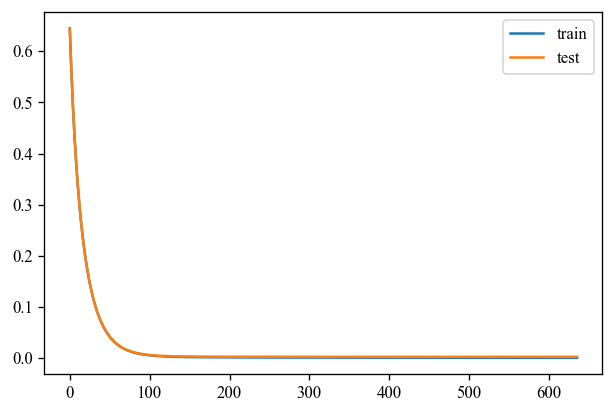

In [24]:
# Plot Learning Curve

results=clf.evals_result()

preds = clf.predict(X_test)
pred_labels = np.rint(preds)
accuracy = accuracy_score(y_test, pred_labels)
print(accuracy)

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (6,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 120 # 提高图片分辨率

plt.plot(results['validation_0']['logloss'],label='train')
plt.plot(results['validation_1']['logloss'],label='test')
plt.legend()
plt.show()

In [12]:
# clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
#         eval_set=[(X_train, y_train),(X_test, y_test)])

[0]	validation_0-logloss:0.64463	validation_1-logloss:0.64460
[1]	validation_0-logloss:0.60064	validation_1-logloss:0.60068
[2]	validation_0-logloss:0.56081	validation_1-logloss:0.56085
[3]	validation_0-logloss:0.52431	validation_1-logloss:0.52437
[4]	validation_0-logloss:0.49086	validation_1-logloss:0.49095
[5]	validation_0-logloss:0.46013	validation_1-logloss:0.46026
[6]	validation_0-logloss:0.43181	validation_1-logloss:0.43195
[7]	validation_0-logloss:0.40564	validation_1-logloss:0.40580
[8]	validation_0-logloss:0.38141	validation_1-logloss:0.38158
[9]	validation_0-logloss:0.35896	validation_1-logloss:0.35910
[10]	validation_0-logloss:0.33804	validation_1-logloss:0.33821
[11]	validation_0-logloss:0.31864	validation_1-logloss:0.31883
[12]	validation_0-logloss:0.30057	validation_1-logloss:0.30077
[13]	validation_0-logloss:0.28363	validation_1-logloss:0.28383
[14]	validation_0-logloss:0.26783	validation_1-logloss:0.26806
[15]	validation_0-logloss:0.25299	validation_1-logloss:0.25324
[1

[130]	validation_0-logloss:0.00241	validation_1-logloss:0.00353
[131]	validation_0-logloss:0.00237	validation_1-logloss:0.00349
[132]	validation_0-logloss:0.00233	validation_1-logloss:0.00346
[133]	validation_0-logloss:0.00229	validation_1-logloss:0.00343
[134]	validation_0-logloss:0.00225	validation_1-logloss:0.00340
[135]	validation_0-logloss:0.00221	validation_1-logloss:0.00337
[136]	validation_0-logloss:0.00218	validation_1-logloss:0.00334
[137]	validation_0-logloss:0.00214	validation_1-logloss:0.00331
[138]	validation_0-logloss:0.00211	validation_1-logloss:0.00328
[139]	validation_0-logloss:0.00208	validation_1-logloss:0.00325
[140]	validation_0-logloss:0.00205	validation_1-logloss:0.00322
[141]	validation_0-logloss:0.00202	validation_1-logloss:0.00320
[142]	validation_0-logloss:0.00199	validation_1-logloss:0.00317
[143]	validation_0-logloss:0.00196	validation_1-logloss:0.00315
[144]	validation_0-logloss:0.00194	validation_1-logloss:0.00313
[145]	validation_0-logloss:0.00191	valid

[259]	validation_0-logloss:0.00103	validation_1-logloss:0.00252
[260]	validation_0-logloss:0.00103	validation_1-logloss:0.00252
[261]	validation_0-logloss:0.00103	validation_1-logloss:0.00252
[262]	validation_0-logloss:0.00102	validation_1-logloss:0.00252
[263]	validation_0-logloss:0.00102	validation_1-logloss:0.00252
[264]	validation_0-logloss:0.00102	validation_1-logloss:0.00252
[265]	validation_0-logloss:0.00101	validation_1-logloss:0.00251
[266]	validation_0-logloss:0.00101	validation_1-logloss:0.00251
[267]	validation_0-logloss:0.00100	validation_1-logloss:0.00251
[268]	validation_0-logloss:0.00100	validation_1-logloss:0.00251
[269]	validation_0-logloss:0.00100	validation_1-logloss:0.00250
[270]	validation_0-logloss:0.00099	validation_1-logloss:0.00250
[271]	validation_0-logloss:0.00099	validation_1-logloss:0.00250
[272]	validation_0-logloss:0.00098	validation_1-logloss:0.00250
[273]	validation_0-logloss:0.00098	validation_1-logloss:0.00250
[274]	validation_0-logloss:0.00097	valid

[388]	validation_0-logloss:0.00074	validation_1-logloss:0.00244
[389]	validation_0-logloss:0.00073	validation_1-logloss:0.00244
[390]	validation_0-logloss:0.00073	validation_1-logloss:0.00244
[391]	validation_0-logloss:0.00073	validation_1-logloss:0.00244
[392]	validation_0-logloss:0.00073	validation_1-logloss:0.00244
[393]	validation_0-logloss:0.00073	validation_1-logloss:0.00244
[394]	validation_0-logloss:0.00073	validation_1-logloss:0.00244
[395]	validation_0-logloss:0.00073	validation_1-logloss:0.00244
[396]	validation_0-logloss:0.00072	validation_1-logloss:0.00244
[397]	validation_0-logloss:0.00072	validation_1-logloss:0.00244
[398]	validation_0-logloss:0.00072	validation_1-logloss:0.00244
[399]	validation_0-logloss:0.00072	validation_1-logloss:0.00243
[400]	validation_0-logloss:0.00072	validation_1-logloss:0.00243
[401]	validation_0-logloss:0.00072	validation_1-logloss:0.00243
[402]	validation_0-logloss:0.00072	validation_1-logloss:0.00243
[403]	validation_0-logloss:0.00072	valid

[517]	validation_0-logloss:0.00062	validation_1-logloss:0.00243
[518]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[519]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[520]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[521]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[522]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[523]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[524]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[525]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[526]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[527]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[528]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[529]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[530]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[531]	validation_0-logloss:0.00061	validation_1-logloss:0.00243
[532]	validation_0-logloss:0.00061	valid

XGBClassifier(alpha=1.7891090581748477, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8718345678647781, eta=0.05,
              gamma=1.1302960282498806, gpu_id=-1, grow_policy='lossguide',
              importance_type='gain', interaction_constraints='',
              lambda=1.3803592642929852, learning_rate=0.0500000007,
              max_delta_step=4, max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=88,
              num_parallel_tree=1, random_state=8888, reg_alpha=1.78910899,
              reg_lambda=1.38035929, scale_pos_weight=1,
              subsample=0.9077021064990229, tree_method='hist',
              validate_parameters=1, verbosity=1)

In [12]:
# clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
#         eval_set=[(X_train, y_train),(X_test, y_test)])

# tuned n_estimators=500,eta=0.02: validation_1-logloss=0.00304, accuracy=0.9990911382157287
# tuned n_estimators=800,eta=0.02: validation_1-logloss=0.00289, accuracy=0.9991980631315253
# tuned n_estimators=1000,eta=0.02: validation_1-logloss=0.00288, accuracy=0.9991980631315253
# tuned n_estimators=1200,eta=0.02: validation_1-logloss=0.00288, accuracy=0.9991980631315253

# tuned n_estimators=1000,eta=0.01: validation_1-logloss=0.00302, accuracy=0.9991522381676124
# tuned n_estimators=1000,eta=0.05: validation_1-logloss=0.00289, accuracy=0.9992057006255107
# tuned n_estimators=1000,eta=0.08: validation_1-logloss=0.00293, accuracy=0.9991980631315253
# tuned n_estimators=1000,eta=0.1: validation_1-logloss=0.00297, accuracy=0.9992057006255107


## 选择n_estimators=1000,eta=0.05

[0]	validation_0-logloss:0.64465	validation_1-logloss:0.64465
[1]	validation_0-logloss:0.60072	validation_1-logloss:0.60076
[2]	validation_0-logloss:0.56093	validation_1-logloss:0.56101
[3]	validation_0-logloss:0.52444	validation_1-logloss:0.52457
[4]	validation_0-logloss:0.49100	validation_1-logloss:0.49119
[5]	validation_0-logloss:0.46028	validation_1-logloss:0.46049
[6]	validation_0-logloss:0.43200	validation_1-logloss:0.43221
[7]	validation_0-logloss:0.40581	validation_1-logloss:0.40607
[8]	validation_0-logloss:0.38160	validation_1-logloss:0.38187
[9]	validation_0-logloss:0.35913	validation_1-logloss:0.35945
[10]	validation_0-logloss:0.33822	validation_1-logloss:0.33857
[11]	validation_0-logloss:0.31884	validation_1-logloss:0.31920
[12]	validation_0-logloss:0.30077	validation_1-logloss:0.30116
[13]	validation_0-logloss:0.28384	validation_1-logloss:0.28425
[14]	validation_0-logloss:0.26806	validation_1-logloss:0.26850
[15]	validation_0-logloss:0.25323	validation_1-logloss:0.25369
[1

[130]	validation_0-logloss:0.00236	validation_1-logloss:0.00389
[131]	validation_0-logloss:0.00232	validation_1-logloss:0.00385
[132]	validation_0-logloss:0.00227	validation_1-logloss:0.00381
[133]	validation_0-logloss:0.00224	validation_1-logloss:0.00377
[134]	validation_0-logloss:0.00220	validation_1-logloss:0.00374
[135]	validation_0-logloss:0.00216	validation_1-logloss:0.00371
[136]	validation_0-logloss:0.00212	validation_1-logloss:0.00367
[137]	validation_0-logloss:0.00209	validation_1-logloss:0.00364
[138]	validation_0-logloss:0.00205	validation_1-logloss:0.00361
[139]	validation_0-logloss:0.00202	validation_1-logloss:0.00359
[140]	validation_0-logloss:0.00199	validation_1-logloss:0.00356
[141]	validation_0-logloss:0.00196	validation_1-logloss:0.00354
[142]	validation_0-logloss:0.00193	validation_1-logloss:0.00351
[143]	validation_0-logloss:0.00190	validation_1-logloss:0.00349
[144]	validation_0-logloss:0.00188	validation_1-logloss:0.00347
[145]	validation_0-logloss:0.00186	valid

[259]	validation_0-logloss:0.00090	validation_1-logloss:0.00291
[260]	validation_0-logloss:0.00089	validation_1-logloss:0.00291
[261]	validation_0-logloss:0.00089	validation_1-logloss:0.00291
[262]	validation_0-logloss:0.00089	validation_1-logloss:0.00291
[263]	validation_0-logloss:0.00088	validation_1-logloss:0.00291
[264]	validation_0-logloss:0.00088	validation_1-logloss:0.00291
[265]	validation_0-logloss:0.00088	validation_1-logloss:0.00291
[266]	validation_0-logloss:0.00087	validation_1-logloss:0.00291
[267]	validation_0-logloss:0.00087	validation_1-logloss:0.00291
[268]	validation_0-logloss:0.00087	validation_1-logloss:0.00290
[269]	validation_0-logloss:0.00086	validation_1-logloss:0.00290
[270]	validation_0-logloss:0.00085	validation_1-logloss:0.00290
[271]	validation_0-logloss:0.00085	validation_1-logloss:0.00290
[272]	validation_0-logloss:0.00085	validation_1-logloss:0.00290
[273]	validation_0-logloss:0.00085	validation_1-logloss:0.00290
[274]	validation_0-logloss:0.00084	valid

[388]	validation_0-logloss:0.00051	validation_1-logloss:0.00288
[389]	validation_0-logloss:0.00051	validation_1-logloss:0.00289
[390]	validation_0-logloss:0.00051	validation_1-logloss:0.00289
[391]	validation_0-logloss:0.00050	validation_1-logloss:0.00288
[392]	validation_0-logloss:0.00050	validation_1-logloss:0.00289
[393]	validation_0-logloss:0.00050	validation_1-logloss:0.00288
[394]	validation_0-logloss:0.00050	validation_1-logloss:0.00289
[395]	validation_0-logloss:0.00050	validation_1-logloss:0.00288
[396]	validation_0-logloss:0.00049	validation_1-logloss:0.00288
[397]	validation_0-logloss:0.00049	validation_1-logloss:0.00289
[398]	validation_0-logloss:0.00049	validation_1-logloss:0.00289
[399]	validation_0-logloss:0.00049	validation_1-logloss:0.00289
[400]	validation_0-logloss:0.00049	validation_1-logloss:0.00289
[401]	validation_0-logloss:0.00049	validation_1-logloss:0.00289
[402]	validation_0-logloss:0.00049	validation_1-logloss:0.00289
[403]	validation_0-logloss:0.00048	valid

XGBClassifier(alpha=0.37588851885081564, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8664726082942656, eta=0.05,
              gamma=0.2517811355164694, gpu_id=-1, grow_policy='lossguide',
              importance_type='gain', interaction_constraints='',
              lambda=2.1166099315127616, learning_rate=0.0500000007,
              max_delta_step=5, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=88,
              num_parallel_tree=1, random_state=8888, reg_alpha=0.375888526,
              reg_lambda=2.11661005, scale_pos_weight=1,
              subsample=0.9604551106992315, tree_method='hist',
              validate_parameters=1, verbosity=1)

In [14]:
clf

XGBClassifier(alpha=1.7891090581748477, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8718345678647781, eta=0.05,
              gamma=1.1302960282498806, gpu_id=-1, grow_policy='lossguide',
              importance_type='gain', interaction_constraints='',
              lambda=1.3803592642929852, learning_rate=0.0500000007,
              max_delta_step=4, max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=88,
              num_parallel_tree=1, random_state=8888, reg_alpha=1.78910899,
              reg_lambda=1.38035929, scale_pos_weight=1,
              subsample=0.9077021064990229, tree_method='hist',
              validate_parameters=1, verbosity=1)

## 2. save the model

In [25]:
from pathlib import Path

In [26]:
Path('../output/models/').mkdir(exist_ok=True, parents=True)

In [27]:
# only save dict and cannot be imported as a classifier
clf.save_model("../output/models/xgb_ext_vs_star_cv500-test6.json")

In [28]:
# save the classifier and load it with pickle
pickle.dump(clf, open('clf1-test6.pkl', 'wb'))

# to load the model, use:
# pickled_model = pickle.load(open('clf1-test2.pkl', 'rb'))

## 3. Evaluation Metrics

In [29]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.serif'] = ['Times New Roman']

In [30]:
# default

preds_d = clf_default.predict(X_test)
pred_labels_d = np.rint(preds_d)

accuracy_d = accuracy_score(y_test, pred_labels_d)
precision_d = precision_score(y_true=y_test, y_pred=pred_labels_d)
recall_d = recall_score(y_true=y_test, y_pred=pred_labels_d)
f1_d = f1_score(y_true=y_test, y_pred=pred_labels_d)
matcoef_d = matthews_corrcoef(y_test, pred_labels_d)

print("accuracy_score:",accuracy_d)
print('precision:',precision_d)
print('recall:',recall_d)
print('f1:',f1_d)
print('matcoef:',matcoef_d)

accuracy_score: 0.999146619272299
precision: 0.9994958936335567
recall: 0.9992335394727172
f1: 0.999364699334772
matcoef: 0.9980653386555292


In [31]:
# optuna cv 500 optimized

preds = clf.predict(X_test)
pred_labels = np.rint(preds)

accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_true=y_test, y_pred=pred_labels)
recall = recall_score(y_true=y_test, y_pred=pred_labels)
f1 = f1_score(y_true=y_test, y_pred=pred_labels)
matcoef = matthews_corrcoef(y_test, pred_labels)

print("accuracy_score:",accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)
print('matcoef:',matcoef)

accuracy_score: 0.9991889356720197
precision: 0.9995378927911276
recall: 0.9992545383912729
f1: 0.9993961955066446
matcoef: 0.9981613097015538


auc_precision_recall_tuned: 0.999991224423007
auc_precision_recall_default: 0.9999896563292873


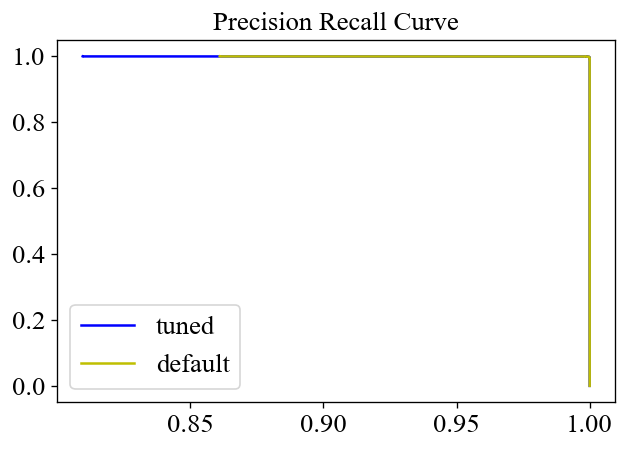

In [32]:
# Precision Recall Curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba_d = clf_default.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
precision_d,recall_d, thresholds_d = precision_recall_curve(y_test,y_pred_proba_d)

plt.plot(precision, recall, color='b',label='tuned')
plt.plot(precision_d,recall_d, color='y',label='default')
plt.legend()
plt.title('Precision Recall Curve')

# 画图很难看得出来，计算一下auc吧

auc_precision_recall = auc(recall, precision)
auc_precision_recall_d = auc(recall_d, precision_d)
print('auc_precision_recall_tuned:',auc_precision_recall)
print('auc_precision_recall_default:',auc_precision_recall_d)

## 4. feature importance

In [33]:
binary1.columns

Index(['index', 'ra', 'dec', 'class', 'iz', 'zy', 'yj', 'jh', 'hk', 'iw1',
       'zw1', 'yw1', 'jw1', 'hw1', 'kw1', 'w1w2'],
      dtype='object')

In [5]:
clf = pickle.load(open('clf1-test6.pkl', 'rb'))

In [6]:
clf.get_booster().feature_names = ['$i-z$','$z-y$','$y-J$','$J-H$',
                                   '$H-K$','$i-W1$','$z-W1$','$y-W1$','$J-W1$','$H-W1$','$K-W1$','$W1-W2$']

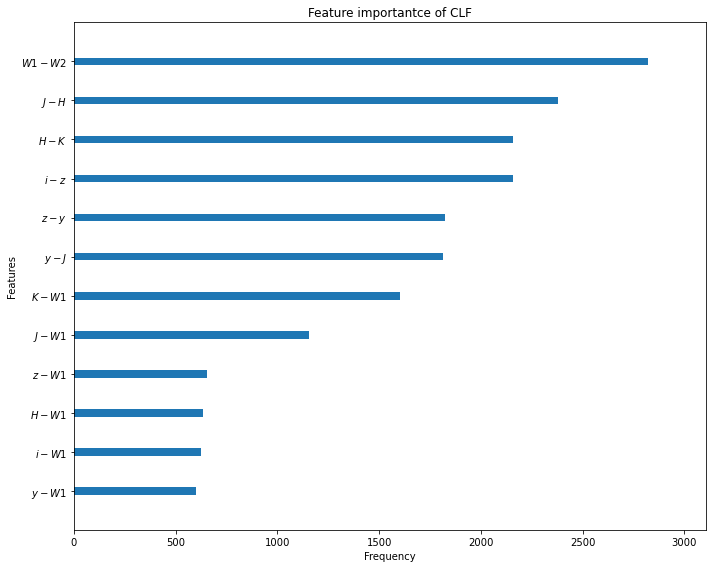

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(clf.get_booster(),
                    ax=ax,
                    show_values=False,
                    xlabel="Frequency")
plt.title("Feature importantce of CLF")
plt.grid(False)
plt.tight_layout()
plt.savefig("feature_freq_clf1-test6.pdf",dpi=300)

In [26]:
# fig, ax = plt.subplots(figsize=(100, 60))
# xgb.plot_tree(clf.get_booster(), ax=ax, num_trees=0)

In [8]:
clf.get_booster().get_score(importance_type= "gain")

{'$J-W1$': 5260.597325223269,
 '$W1-W2$': 29.21271376579035,
 '$J-H$': 10.565983226786228,
 '$K-W1$': 4.243389030757019,
 '$i-W1$': 10.201411889341955,
 '$y-J$': 5.016064647772233,
 '$y-W1$': 327.4217857357191,
 '$H-K$': 10.363037239895295,
 '$i-z$': 4.748511104426845,
 '$z-y$': 4.095849344892912,
 '$H-W1$': 2.5940646145504718,
 '$z-W1$': 78.46533726810533}

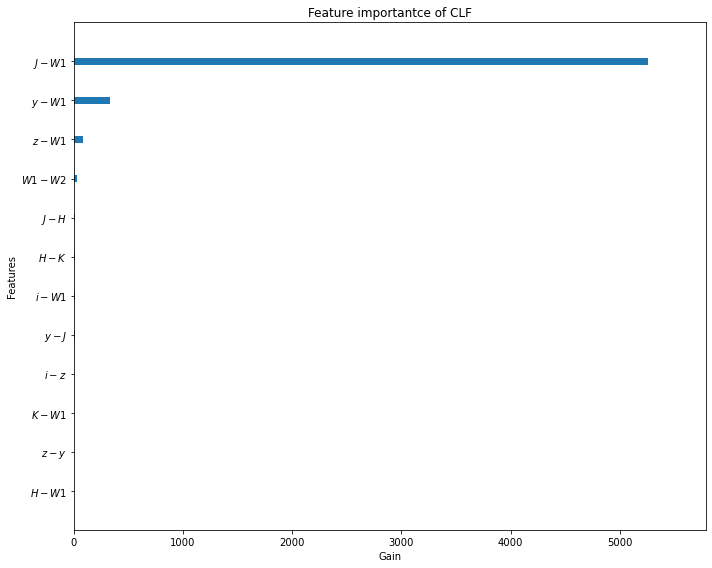

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(clf.get_booster(),
                    ax=ax,
                    importance_type="gain",
                    xlabel="Gain",
                    show_values=False)
plt.title("Feature importantce of CLF")
# ax.set_xscale('log')
# ax.set_xlim([0,10000])
plt.grid(False)
plt.tight_layout()
plt.savefig("feature_gain_clf1-test6.pdf",dpi=300)

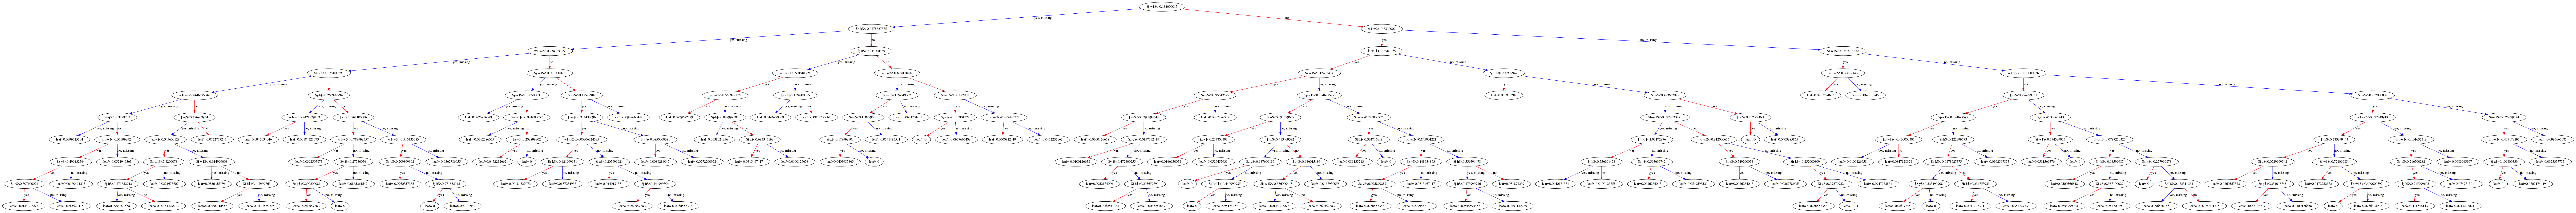

In [57]:
fig2, ax2 = plt.subplots(figsize=(200,100))
xgb.plot_tree(clf.get_booster(), ax=ax2, num_trees=0)
plt.tight_layout()
plt.show()
#fig2.savefig("../output/models/tree_clf_beta.jpg",dpi=300)

In [10]:
clf.get_booster().get_fscore()

{'$J-W1$': 1156,
 '$W1-W2$': 2822,
 '$J-H$': 2379,
 '$K-W1$': 1601,
 '$i-W1$': 622,
 '$y-J$': 1815,
 '$y-W1$': 600,
 '$H-K$': 2159,
 '$i-z$': 2157,
 '$z-y$': 1821,
 '$H-W1$': 634,
 '$z-W1$': 655}

## 4. confusion matrix

In [39]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [40]:
clf.predict_proba(X_test)

array([[3.5762787e-07, 9.9999964e-01],
       [4.7683716e-07, 9.9999952e-01],
       [9.9974531e-01, 2.5466166e-04],
       ...,
       [9.9997681e-01, 2.3163100e-05],
       [9.9998349e-01, 1.6483818e-05],
       [5.9604645e-07, 9.9999940e-01]], dtype=float32)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
mycm = confusion_matrix(y_test, y_pred)

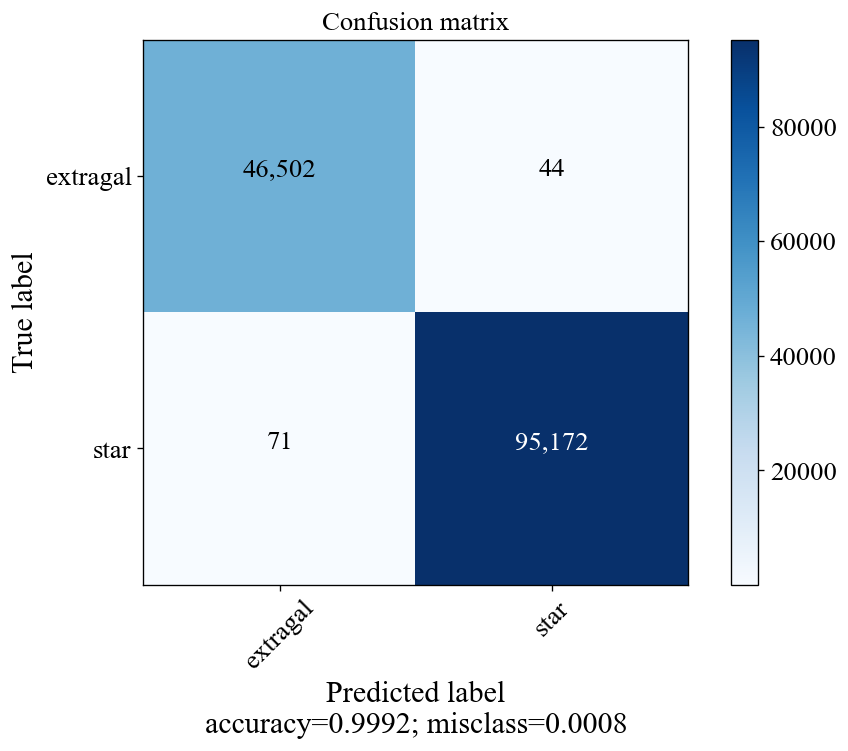

In [43]:
plot_confusion_matrix(mycm,
                      target_names=['extragal','star'],
                      normalize=False
                     )

# Step 2. QSO VS GALAXY

In [35]:
binary2 = pd.read_csv("trainingset_binary2_test5.csv")
features = ['iz','zy','yj','jh','hk','iw1','zw1','yw1','jw1','hw1','kw1','w1w2']

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['QSO','GALAXY'])  
X = binary2[features].values
y = le.transform(binary2['class'])

In [37]:
y  # galaxy:0, qso:1

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8888)

In [39]:
X_train.shape

(186057, 12)

In [40]:
X_test.shape

(46515, 12)

# Train model using XGBoost optuna CV-best parameters

## 1. Train & save the model

In [41]:
# 5-fold, optuna, 500 trials

# Params: 
#     lambda: 1.2413359401393276
#     alpha: 0.16326090314688657
#     max_depth: 8
#     eta: 0.1
#     gamma: 1.1868232671204701
#     grow_policy: depthwise
#     min_child_weight: 4
#     subsample: 0.8780950055491423
#     colsample_bytree: 0.9241363413993084
#     max_delta_step: 3

param = {
     'verbosity': 1,
     'booster': 'gbtree',
     'tree_method': 'hist',
     'lambda': 1.2413359401393276,
     'alpha': 0.16326090314688657,
     'max_depth': 8,
     #'eta': 0.1,  
     'gamma': 1.1868232671204701, 
     'grow_policy': 'depthwise', 
     'min_child_weight': 4, 
     'subsample': 0.8780950055491423, 
     'colsample_bytree': 0.9241363413993084, 
     'max_delta_step': 3,
     'random_state': 8888,
     # 'n_jobs': 40 
 }




In [42]:
clf_default = xgb.XGBClassifier(objective='binary:logistic', 
                         n_estimators=1000,eta=0.02
                       )

In [43]:
clf_default.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_test, y_test)])

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.67443
[1]	validation_0-logloss:0.65645
[2]	validation_0-logloss:0.63916
[3]	validation_0-logloss:0.62252
[4]	validation_0-logloss:0.60649
[5]	validation_0-logloss:0.59106
[6]	validation_0-logloss:0.57617
[7]	validation_0-logloss:0.56182
[8]	validation_0-logloss:0.54795
[9]	validation_0-logloss:0.53457
[10]	validation_0-logloss:0.52163
[11]	validation_0-logloss:0.50914
[12]	validation_0-logloss:0.49704
[13]	validation_0-logloss:0.48535
[14]	validation_0-logloss:0.47403
[15]	validation_0-logloss:0.46308
[16]	validation_0-logloss:0.45246
[17]	validation_0-logloss:0.44218
[18]	validation_0-logloss:0.43219
[19]	validation_0-logloss:0.42252
[20]	validation_0-logloss:0.41315
[21]	validation_0-logloss:0.40404
[22]	validation_0-logloss:0.39521
[23]	validation_0-logloss:0.38663
[24]	validation_0-logloss:0.37831
[25]	validation_0-logloss:0.37022
[26]	validation_0-logloss:0.36237
[27]	validation_0-logloss:0.35474
[28]	validation_0-logloss:0.34731
[29]	validation_0-loglos

[238]	validation_0-logloss:0.04738
[239]	validation_0-logloss:0.04731
[240]	validation_0-logloss:0.04725
[241]	validation_0-logloss:0.04718
[242]	validation_0-logloss:0.04710
[243]	validation_0-logloss:0.04704
[244]	validation_0-logloss:0.04696
[245]	validation_0-logloss:0.04689
[246]	validation_0-logloss:0.04683
[247]	validation_0-logloss:0.04675
[248]	validation_0-logloss:0.04668
[249]	validation_0-logloss:0.04662
[250]	validation_0-logloss:0.04655
[251]	validation_0-logloss:0.04649
[252]	validation_0-logloss:0.04643
[253]	validation_0-logloss:0.04637
[254]	validation_0-logloss:0.04631
[255]	validation_0-logloss:0.04625
[256]	validation_0-logloss:0.04619
[257]	validation_0-logloss:0.04614
[258]	validation_0-logloss:0.04609
[259]	validation_0-logloss:0.04603
[260]	validation_0-logloss:0.04598
[261]	validation_0-logloss:0.04593
[262]	validation_0-logloss:0.04589
[263]	validation_0-logloss:0.04585
[264]	validation_0-logloss:0.04580
[265]	validation_0-logloss:0.04576
[266]	validation_0-l

[473]	validation_0-logloss:0.04253
[474]	validation_0-logloss:0.04253
[475]	validation_0-logloss:0.04252
[476]	validation_0-logloss:0.04252
[477]	validation_0-logloss:0.04251
[478]	validation_0-logloss:0.04251
[479]	validation_0-logloss:0.04251
[480]	validation_0-logloss:0.04251
[481]	validation_0-logloss:0.04251
[482]	validation_0-logloss:0.04251
[483]	validation_0-logloss:0.04251
[484]	validation_0-logloss:0.04251
[485]	validation_0-logloss:0.04249
[486]	validation_0-logloss:0.04249
[487]	validation_0-logloss:0.04248
[488]	validation_0-logloss:0.04248
[489]	validation_0-logloss:0.04247
[490]	validation_0-logloss:0.04246
[491]	validation_0-logloss:0.04246
[492]	validation_0-logloss:0.04245
[493]	validation_0-logloss:0.04246
[494]	validation_0-logloss:0.04245
[495]	validation_0-logloss:0.04244
[496]	validation_0-logloss:0.04244
[497]	validation_0-logloss:0.04244
[498]	validation_0-logloss:0.04243
[499]	validation_0-logloss:0.04243
[500]	validation_0-logloss:0.04243
[501]	validation_0-l

[708]	validation_0-logloss:0.04197
[709]	validation_0-logloss:0.04197
[710]	validation_0-logloss:0.04197
[711]	validation_0-logloss:0.04196
[712]	validation_0-logloss:0.04196
[713]	validation_0-logloss:0.04195
[714]	validation_0-logloss:0.04194
[715]	validation_0-logloss:0.04194
[716]	validation_0-logloss:0.04194
[717]	validation_0-logloss:0.04194
[718]	validation_0-logloss:0.04193
[719]	validation_0-logloss:0.04192
[720]	validation_0-logloss:0.04192
[721]	validation_0-logloss:0.04192
[722]	validation_0-logloss:0.04192
[723]	validation_0-logloss:0.04192
[724]	validation_0-logloss:0.04192
[725]	validation_0-logloss:0.04192
[726]	validation_0-logloss:0.04192
[727]	validation_0-logloss:0.04192
[728]	validation_0-logloss:0.04191
[729]	validation_0-logloss:0.04191
[730]	validation_0-logloss:0.04192
[731]	validation_0-logloss:0.04191
[732]	validation_0-logloss:0.04190
[733]	validation_0-logloss:0.04190
[734]	validation_0-logloss:0.04190
[735]	validation_0-logloss:0.04190
[736]	validation_0-l

[943]	validation_0-logloss:0.04171
[944]	validation_0-logloss:0.04171
[945]	validation_0-logloss:0.04170
[946]	validation_0-logloss:0.04170
[947]	validation_0-logloss:0.04170
[948]	validation_0-logloss:0.04170
[949]	validation_0-logloss:0.04170
[950]	validation_0-logloss:0.04170
[951]	validation_0-logloss:0.04171
[952]	validation_0-logloss:0.04171
[953]	validation_0-logloss:0.04171
[954]	validation_0-logloss:0.04171
[955]	validation_0-logloss:0.04170
[956]	validation_0-logloss:0.04170
[957]	validation_0-logloss:0.04170
[958]	validation_0-logloss:0.04171
[959]	validation_0-logloss:0.04171
[960]	validation_0-logloss:0.04171
[961]	validation_0-logloss:0.04171
[962]	validation_0-logloss:0.04171
[963]	validation_0-logloss:0.04171
[964]	validation_0-logloss:0.04171
[965]	validation_0-logloss:0.04171
[966]	validation_0-logloss:0.04171
[967]	validation_0-logloss:0.04172
[968]	validation_0-logloss:0.04171
[969]	validation_0-logloss:0.04171
[970]	validation_0-logloss:0.04171
[971]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.02, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=88, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
clf = xgb.XGBClassifier(objective='binary:logistic', 
                         n_estimators=1000,eta=0.02,
                         **param
                       )

In [45]:
clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_train, y_train),(X_test, y_test)])

[0]	validation_0-logloss:0.67429	validation_1-logloss:0.67436
[1]	validation_0-logloss:0.65619	validation_1-logloss:0.65633
[2]	validation_0-logloss:0.63879	validation_1-logloss:0.63898
[3]	validation_0-logloss:0.62202	validation_1-logloss:0.62229
[4]	validation_0-logloss:0.60589	validation_1-logloss:0.60621
[5]	validation_0-logloss:0.59033	validation_1-logloss:0.59071
[6]	validation_0-logloss:0.57532	validation_1-logloss:0.57576
[7]	validation_0-logloss:0.56085	validation_1-logloss:0.56134
[8]	validation_0-logloss:0.54688	validation_1-logloss:0.54743
[9]	validation_0-logloss:0.53342	validation_1-logloss:0.53402
[10]	validation_0-logloss:0.52040	validation_1-logloss:0.52104
[11]	validation_0-logloss:0.50968	validation_1-logloss:0.51039
[12]	validation_0-logloss:0.49933	validation_1-logloss:0.50011
[13]	validation_0-logloss:0.48742	validation_1-logloss:0.48825
[14]	validation_0-logloss:0.47587	validation_1-logloss:0.47676
[15]	validation_0-logloss:0.46470	validation_1-logloss:0.46564
[1

[130]	validation_0-logloss:0.07014	validation_1-logloss:0.07479
[131]	validation_0-logloss:0.06941	validation_1-logloss:0.07408
[132]	validation_0-logloss:0.06871	validation_1-logloss:0.07340
[133]	validation_0-logloss:0.06801	validation_1-logloss:0.07274
[134]	validation_0-logloss:0.06733	validation_1-logloss:0.07209
[135]	validation_0-logloss:0.06667	validation_1-logloss:0.07146
[136]	validation_0-logloss:0.06602	validation_1-logloss:0.07084
[137]	validation_0-logloss:0.06539	validation_1-logloss:0.07022
[138]	validation_0-logloss:0.06476	validation_1-logloss:0.06961
[139]	validation_0-logloss:0.06413	validation_1-logloss:0.06902
[140]	validation_0-logloss:0.06354	validation_1-logloss:0.06845
[141]	validation_0-logloss:0.06295	validation_1-logloss:0.06788
[142]	validation_0-logloss:0.06236	validation_1-logloss:0.06733
[143]	validation_0-logloss:0.06190	validation_1-logloss:0.06688
[144]	validation_0-logloss:0.06133	validation_1-logloss:0.06635
[145]	validation_0-logloss:0.06079	valid

[259]	validation_0-logloss:0.03576	validation_1-logloss:0.04362
[260]	validation_0-logloss:0.03569	validation_1-logloss:0.04356
[261]	validation_0-logloss:0.03562	validation_1-logloss:0.04351
[262]	validation_0-logloss:0.03554	validation_1-logloss:0.04346
[263]	validation_0-logloss:0.03547	validation_1-logloss:0.04342
[264]	validation_0-logloss:0.03540	validation_1-logloss:0.04337
[265]	validation_0-logloss:0.03534	validation_1-logloss:0.04333
[266]	validation_0-logloss:0.03528	validation_1-logloss:0.04328
[267]	validation_0-logloss:0.03521	validation_1-logloss:0.04325
[268]	validation_0-logloss:0.03515	validation_1-logloss:0.04321
[269]	validation_0-logloss:0.03510	validation_1-logloss:0.04318
[270]	validation_0-logloss:0.03504	validation_1-logloss:0.04313
[271]	validation_0-logloss:0.03498	validation_1-logloss:0.04309
[272]	validation_0-logloss:0.03492	validation_1-logloss:0.04305
[273]	validation_0-logloss:0.03486	validation_1-logloss:0.04301
[274]	validation_0-logloss:0.03480	valid

[388]	validation_0-logloss:0.03112	validation_1-logloss:0.04117
[389]	validation_0-logloss:0.03111	validation_1-logloss:0.04117
[390]	validation_0-logloss:0.03110	validation_1-logloss:0.04117
[391]	validation_0-logloss:0.03110	validation_1-logloss:0.04116
[392]	validation_0-logloss:0.03109	validation_1-logloss:0.04116
[393]	validation_0-logloss:0.03106	validation_1-logloss:0.04115
[394]	validation_0-logloss:0.03104	validation_1-logloss:0.04115
[395]	validation_0-logloss:0.03102	validation_1-logloss:0.04114
[396]	validation_0-logloss:0.03100	validation_1-logloss:0.04114
[397]	validation_0-logloss:0.03099	validation_1-logloss:0.04114
[398]	validation_0-logloss:0.03097	validation_1-logloss:0.04114
[399]	validation_0-logloss:0.03097	validation_1-logloss:0.04113
[400]	validation_0-logloss:0.03095	validation_1-logloss:0.04113
[401]	validation_0-logloss:0.03095	validation_1-logloss:0.04113
[402]	validation_0-logloss:0.03093	validation_1-logloss:0.04113
[403]	validation_0-logloss:0.03090	valid

[517]	validation_0-logloss:0.02921	validation_1-logloss:0.04077
[518]	validation_0-logloss:0.02919	validation_1-logloss:0.04077
[519]	validation_0-logloss:0.02919	validation_1-logloss:0.04077
[520]	validation_0-logloss:0.02916	validation_1-logloss:0.04076
[521]	validation_0-logloss:0.02915	validation_1-logloss:0.04076
[522]	validation_0-logloss:0.02914	validation_1-logloss:0.04076
[523]	validation_0-logloss:0.02913	validation_1-logloss:0.04076
[524]	validation_0-logloss:0.02912	validation_1-logloss:0.04076
[525]	validation_0-logloss:0.02911	validation_1-logloss:0.04076
[526]	validation_0-logloss:0.02911	validation_1-logloss:0.04076
[527]	validation_0-logloss:0.02906	validation_1-logloss:0.04075
[528]	validation_0-logloss:0.02903	validation_1-logloss:0.04075
[529]	validation_0-logloss:0.02900	validation_1-logloss:0.04076
[530]	validation_0-logloss:0.02899	validation_1-logloss:0.04076
[531]	validation_0-logloss:0.02897	validation_1-logloss:0.04076
[532]	validation_0-logloss:0.02897	valid

[646]	validation_0-logloss:0.02738	validation_1-logloss:0.04063
[647]	validation_0-logloss:0.02736	validation_1-logloss:0.04063
[648]	validation_0-logloss:0.02735	validation_1-logloss:0.04062
[649]	validation_0-logloss:0.02735	validation_1-logloss:0.04063
[650]	validation_0-logloss:0.02734	validation_1-logloss:0.04063
[651]	validation_0-logloss:0.02732	validation_1-logloss:0.04063
[652]	validation_0-logloss:0.02730	validation_1-logloss:0.04063
[653]	validation_0-logloss:0.02730	validation_1-logloss:0.04063
[654]	validation_0-logloss:0.02729	validation_1-logloss:0.04063
[655]	validation_0-logloss:0.02728	validation_1-logloss:0.04064
[656]	validation_0-logloss:0.02728	validation_1-logloss:0.04064
[657]	validation_0-logloss:0.02726	validation_1-logloss:0.04063
[658]	validation_0-logloss:0.02724	validation_1-logloss:0.04063
[659]	validation_0-logloss:0.02723	validation_1-logloss:0.04063
[660]	validation_0-logloss:0.02722	validation_1-logloss:0.04063
[661]	validation_0-logloss:0.02721	valid

[775]	validation_0-logloss:0.02577	validation_1-logloss:0.04059
[776]	validation_0-logloss:0.02576	validation_1-logloss:0.04059
[777]	validation_0-logloss:0.02573	validation_1-logloss:0.04059
[778]	validation_0-logloss:0.02573	validation_1-logloss:0.04059
[779]	validation_0-logloss:0.02572	validation_1-logloss:0.04059
[780]	validation_0-logloss:0.02570	validation_1-logloss:0.04059
[781]	validation_0-logloss:0.02568	validation_1-logloss:0.04059
[782]	validation_0-logloss:0.02568	validation_1-logloss:0.04059
[783]	validation_0-logloss:0.02567	validation_1-logloss:0.04059
[784]	validation_0-logloss:0.02565	validation_1-logloss:0.04059
[785]	validation_0-logloss:0.02564	validation_1-logloss:0.04059
[786]	validation_0-logloss:0.02563	validation_1-logloss:0.04059
[787]	validation_0-logloss:0.02562	validation_1-logloss:0.04059
[788]	validation_0-logloss:0.02561	validation_1-logloss:0.04059
[789]	validation_0-logloss:0.02560	validation_1-logloss:0.04059
[790]	validation_0-logloss:0.02559	valid

[904]	validation_0-logloss:0.02425	validation_1-logloss:0.04062
[905]	validation_0-logloss:0.02424	validation_1-logloss:0.04062
[906]	validation_0-logloss:0.02424	validation_1-logloss:0.04062
[907]	validation_0-logloss:0.02422	validation_1-logloss:0.04062
[908]	validation_0-logloss:0.02420	validation_1-logloss:0.04062
[909]	validation_0-logloss:0.02419	validation_1-logloss:0.04063
[910]	validation_0-logloss:0.02417	validation_1-logloss:0.04063
[911]	validation_0-logloss:0.02417	validation_1-logloss:0.04063
[912]	validation_0-logloss:0.02415	validation_1-logloss:0.04063
[913]	validation_0-logloss:0.02414	validation_1-logloss:0.04063
[914]	validation_0-logloss:0.02413	validation_1-logloss:0.04063
[915]	validation_0-logloss:0.02412	validation_1-logloss:0.04063


XGBClassifier(alpha=0.16326090314688657, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9241363413993084, eta=0.02,
              gamma=1.1868232671204701, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              lambda=1.2413359401393276, learning_rate=0.0199999996,
              max_delta_step=3, max_depth=8, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=88,
              num_parallel_tree=1, random_state=8888, reg_alpha=0.163260907,
              reg_lambda=1.24133599, scale_pos_weight=1,
              subsample=0.8780950055491423, tree_method='hist',
              validate_parameters=1, verbosity=1)

In [39]:
# clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
#         eval_set=[(X_train, y_train),(X_test, y_test)])

# no tuning, n_estimators=100: validation_0-logloss:0.04570, accuracy=0.9862456451255613
# no tuning, n_estimators=1000,eta=0.02: validation_0-logloss:0.04447, accuracy=0.9863463358640272

# tuned, n_estimators=100, eta=0.3: validation_0-logloss:0.04403, accuracy=0.9867289606701976
# tuned, n_estimators=500, eta=0.02: validation_0-logloss:0.04367, accuracy=0.9867893751132771
# tuned, n_estimators=500, eta=0.02: validation_0-logloss:0.04367, accuracy=0.9867893751132771
# tuned, n_estimators=800, eta=0.02: validation_0-logloss:0.04367, accuracy=0.9867893751132771
# tuned, n_estimators=1000, eta=0.02: validation_0-logloss:0.04369, accuracy=0.9868699277040498
# tuned, n_estimators=1200, eta=0.02: validation_0-logloss:0.04369, accuracy=0.9868699277040498

# tuned, n_estimators=1000, eta=0.02: validation_0-logloss:0.04369, accuracy=0.9868699277040498
# tuned, n_estimators=1000, eta=0.03: validation_0-logloss:0.04368, accuracy=0.9867289606701976
# tuned, n_estimators=1000, eta=0.05: validation_0-logloss:0.04396, accuracy=0.9867893751132771
# tuned, n_estimators=1000, eta=0.01: validation_0-logloss:0.04360, accuracy=0.9867692369655839


## 选择n_estimators=1000, eta=0.02

[0]	validation_0-logloss:0.67426	validation_1-logloss:0.67435
[1]	validation_0-logloss:0.65610	validation_1-logloss:0.65631
[2]	validation_0-logloss:0.64137	validation_1-logloss:0.64168
[3]	validation_0-logloss:0.62447	validation_1-logloss:0.62488
[4]	validation_0-logloss:0.60819	validation_1-logloss:0.60869
[5]	validation_0-logloss:0.59253	validation_1-logloss:0.59313
[6]	validation_0-logloss:0.57741	validation_1-logloss:0.57810
[7]	validation_0-logloss:0.56282	validation_1-logloss:0.56362
[8]	validation_0-logloss:0.54873	validation_1-logloss:0.54961
[9]	validation_0-logloss:0.53526	validation_1-logloss:0.53623
[10]	validation_0-logloss:0.52420	validation_1-logloss:0.52525
[11]	validation_0-logloss:0.51346	validation_1-logloss:0.51460
[12]	validation_0-logloss:0.50336	validation_1-logloss:0.50460
[13]	validation_0-logloss:0.49136	validation_1-logloss:0.49267
[14]	validation_0-logloss:0.48166	validation_1-logloss:0.48307
[15]	validation_0-logloss:0.47034	validation_1-logloss:0.47183
[1

[130]	validation_0-logloss:0.07311	validation_1-logloss:0.08019
[131]	validation_0-logloss:0.07226	validation_1-logloss:0.07939
[132]	validation_0-logloss:0.07145	validation_1-logloss:0.07863
[133]	validation_0-logloss:0.07092	validation_1-logloss:0.07813
[134]	validation_0-logloss:0.07039	validation_1-logloss:0.07763
[135]	validation_0-logloss:0.06962	validation_1-logloss:0.07690
[136]	validation_0-logloss:0.06886	validation_1-logloss:0.07618
[137]	validation_0-logloss:0.06812	validation_1-logloss:0.07549
[138]	validation_0-logloss:0.06738	validation_1-logloss:0.07479
[139]	validation_0-logloss:0.06666	validation_1-logloss:0.07412
[140]	validation_0-logloss:0.06596	validation_1-logloss:0.07347
[141]	validation_0-logloss:0.06527	validation_1-logloss:0.07282
[142]	validation_0-logloss:0.06460	validation_1-logloss:0.07219
[143]	validation_0-logloss:0.06412	validation_1-logloss:0.07174
[144]	validation_0-logloss:0.06347	validation_1-logloss:0.07112
[145]	validation_0-logloss:0.06305	valid

[259]	validation_0-logloss:0.03430	validation_1-logloss:0.04641
[260]	validation_0-logloss:0.03419	validation_1-logloss:0.04635
[261]	validation_0-logloss:0.03413	validation_1-logloss:0.04632
[262]	validation_0-logloss:0.03404	validation_1-logloss:0.04626
[263]	validation_0-logloss:0.03394	validation_1-logloss:0.04621
[264]	validation_0-logloss:0.03384	validation_1-logloss:0.04615
[265]	validation_0-logloss:0.03374	validation_1-logloss:0.04610
[266]	validation_0-logloss:0.03367	validation_1-logloss:0.04606
[267]	validation_0-logloss:0.03357	validation_1-logloss:0.04600
[268]	validation_0-logloss:0.03348	validation_1-logloss:0.04595
[269]	validation_0-logloss:0.03342	validation_1-logloss:0.04592
[270]	validation_0-logloss:0.03333	validation_1-logloss:0.04587
[271]	validation_0-logloss:0.03323	validation_1-logloss:0.04581
[272]	validation_0-logloss:0.03318	validation_1-logloss:0.04579
[273]	validation_0-logloss:0.03309	validation_1-logloss:0.04574
[274]	validation_0-logloss:0.03300	valid

[388]	validation_0-logloss:0.02772	validation_1-logloss:0.04382
[389]	validation_0-logloss:0.02770	validation_1-logloss:0.04381
[390]	validation_0-logloss:0.02768	validation_1-logloss:0.04381
[391]	validation_0-logloss:0.02765	validation_1-logloss:0.04380
[392]	validation_0-logloss:0.02762	validation_1-logloss:0.04379
[393]	validation_0-logloss:0.02761	validation_1-logloss:0.04379
[394]	validation_0-logloss:0.02758	validation_1-logloss:0.04378
[395]	validation_0-logloss:0.02754	validation_1-logloss:0.04378
[396]	validation_0-logloss:0.02750	validation_1-logloss:0.04377
[397]	validation_0-logloss:0.02748	validation_1-logloss:0.04377
[398]	validation_0-logloss:0.02746	validation_1-logloss:0.04377
[399]	validation_0-logloss:0.02743	validation_1-logloss:0.04376
[400]	validation_0-logloss:0.02741	validation_1-logloss:0.04376
[401]	validation_0-logloss:0.02738	validation_1-logloss:0.04376
[402]	validation_0-logloss:0.02736	validation_1-logloss:0.04376
[403]	validation_0-logloss:0.02733	valid

[517]	validation_0-logloss:0.02518	validation_1-logloss:0.04367
[518]	validation_0-logloss:0.02517	validation_1-logloss:0.04367
[519]	validation_0-logloss:0.02514	validation_1-logloss:0.04367
[520]	validation_0-logloss:0.02513	validation_1-logloss:0.04367
[521]	validation_0-logloss:0.02510	validation_1-logloss:0.04367
[522]	validation_0-logloss:0.02508	validation_1-logloss:0.04367
[523]	validation_0-logloss:0.02507	validation_1-logloss:0.04367
[524]	validation_0-logloss:0.02504	validation_1-logloss:0.04366
[525]	validation_0-logloss:0.02503	validation_1-logloss:0.04366
[526]	validation_0-logloss:0.02502	validation_1-logloss:0.04366
[527]	validation_0-logloss:0.02501	validation_1-logloss:0.04366
[528]	validation_0-logloss:0.02499	validation_1-logloss:0.04366
[529]	validation_0-logloss:0.02496	validation_1-logloss:0.04366
[530]	validation_0-logloss:0.02495	validation_1-logloss:0.04366
[531]	validation_0-logloss:0.02493	validation_1-logloss:0.04366
[532]	validation_0-logloss:0.02492	valid

[646]	validation_0-logloss:0.02308	validation_1-logloss:0.04369
[647]	validation_0-logloss:0.02306	validation_1-logloss:0.04369
[648]	validation_0-logloss:0.02306	validation_1-logloss:0.04369
[649]	validation_0-logloss:0.02304	validation_1-logloss:0.04369
[650]	validation_0-logloss:0.02301	validation_1-logloss:0.04370
[651]	validation_0-logloss:0.02301	validation_1-logloss:0.04370
[652]	validation_0-logloss:0.02300	validation_1-logloss:0.04370
[653]	validation_0-logloss:0.02299	validation_1-logloss:0.04370
[654]	validation_0-logloss:0.02295	validation_1-logloss:0.04369
[655]	validation_0-logloss:0.02293	validation_1-logloss:0.04369
[656]	validation_0-logloss:0.02292	validation_1-logloss:0.04369
[657]	validation_0-logloss:0.02290	validation_1-logloss:0.04370
[658]	validation_0-logloss:0.02287	validation_1-logloss:0.04370
[659]	validation_0-logloss:0.02286	validation_1-logloss:0.04370
[660]	validation_0-logloss:0.02285	validation_1-logloss:0.04370
[661]	validation_0-logloss:0.02282	valid

XGBClassifier(alpha=0.4512391408998466, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8079200202937279, eta=0.02,
              gamma=0.2038341012648358, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              lambda=0.8545938248212175, learning_rate=0.0199999996,
              max_delta_step=2, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=88,
              num_parallel_tree=1, random_state=8888, reg_alpha=0.451239139,
              reg_lambda=0.854593813, scale_pos_weight=1,
              subsample=0.9094012577087329, tree_method='hist',
              validate_parameters=1, verbosity=1)

0.9877028915403633


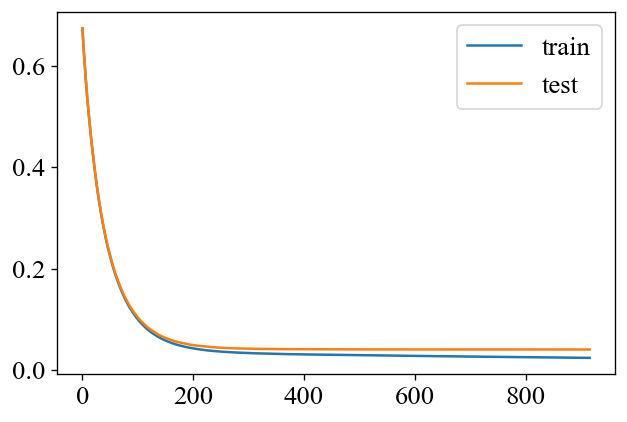

In [46]:
# Plot Learning Curve
results=clf.evals_result()

preds = clf.predict(X_test)
pred_labels = np.rint(preds)
accuracy = accuracy_score(y_test, pred_labels)
print(accuracy)

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (6,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 120 # 提高图片分辨率

plt.plot(results['validation_0']['logloss'],label='train')
plt.plot(results['validation_1']['logloss'],label='test')
plt.legend()
plt.show()

In [47]:
clf

XGBClassifier(alpha=0.16326090314688657, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9241363413993084, eta=0.02,
              gamma=1.1868232671204701, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              lambda=1.2413359401393276, learning_rate=0.0199999996,
              max_delta_step=3, max_depth=8, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=88,
              num_parallel_tree=1, random_state=8888, reg_alpha=0.163260907,
              reg_lambda=1.24133599, scale_pos_weight=1,
              subsample=0.8780950055491423, tree_method='hist',
              validate_parameters=1, verbosity=1)

## 2. save the model

In [48]:
# only save dict and cannot be imported as a classifier
clf.save_model("../output/models/xgb_qso_vs_galaxy_cv500-test5.json")

In [49]:
# save the classifier and load it with pickle
pickle.dump(clf, open('clf2-test5.pkl', 'wb'))

# to load the model, use:
# pickled_model = pickle.load(open('clf2.pkl', 'rb'))

## 3. Evaluation Metrics

In [50]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.serif'] = ['Times New Roman']

In [51]:
# default

preds_d = clf_default.predict(X_test)
pred_labels_d = np.rint(preds_d)

accuracy_d = accuracy_score(y_test, pred_labels_d)
precision_d = precision_score(y_true=y_test, y_pred=pred_labels_d)
recall_d = recall_score(y_true=y_test, y_pred=pred_labels_d)
f1_d = f1_score(y_true=y_test, y_pred=pred_labels_d)
matcoef_d = matthews_corrcoef(y_test, pred_labels_d)

print("accuracy_score:",accuracy_d)
print('precision:',precision_d)
print('recall:',recall_d)
print('f1:',f1_d)
print('matcoef:',matcoef_d)

accuracy_score: 0.9873374180371923
precision: 0.9877952918786976
recall: 0.9878361605295821
f1: 0.9878157257814278
matcoef: 0.9746357495212806


In [52]:
# optuna cv 500 optimized

preds = clf.predict(X_test)
pred_labels = np.rint(preds)
preds,pred_labels

accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_true=y_test, y_pred=pred_labels)
recall = recall_score(y_true=y_test, y_pred=pred_labels)
f1 = f1_score(y_true=y_test, y_pred=pred_labels)
matcoef = matthews_corrcoef(y_test, pred_labels)

print("accuracy_score:",accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)
print('matcoef:',matcoef)

accuracy_score: 0.9877028915403633
precision: 0.9878442073927065
recall: 0.9884981381878362
f1: 0.9881710646041857
matcoef: 0.9753674310350908


aucpr_tuned: 0.9985213153289247
aucpr_default: 0.9983537780252535


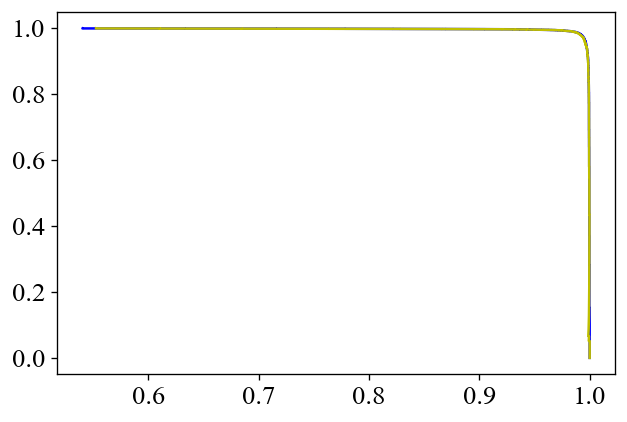

In [53]:
# Precision Recall Curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba_d = clf_default.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
precision_d,recall_d, thresholds_d = precision_recall_curve(y_test,y_pred_proba_d)

plt.plot(precision, recall, color='b')
plt.plot(precision_d,recall_d, color='y')

# 画图很难看得出来，计算一下auc吧

auc_precision_recall = auc(recall, precision)
auc_precision_recall_d = auc(recall_d, precision_d)
print('aucpr_tuned:',auc_precision_recall)
print('aucpr_default:',auc_precision_recall_d)



## 4. feature importance

In [54]:
binary2.columns

Index(['index', 'source_id', 'ra', 'dec', 'class', 'iz', 'zy', 'yj', 'jh',
       'hk', 'iw1', 'zw1', 'yw1', 'jw1', 'hw1', 'kw1', 'w1w2'],
      dtype='object')

In [11]:
clf = pickle.load(open('clf2-test5.pkl', 'rb'))

In [12]:
clf.get_booster().feature_names = ['$i-z$','$z-y$','$y-J$','$J-H$',
                                   '$H-K$','$i-W1$','$z-W1$','$y-W1$','$J-W1$','$H-W1$','$K-W1$','$W1-W2$']

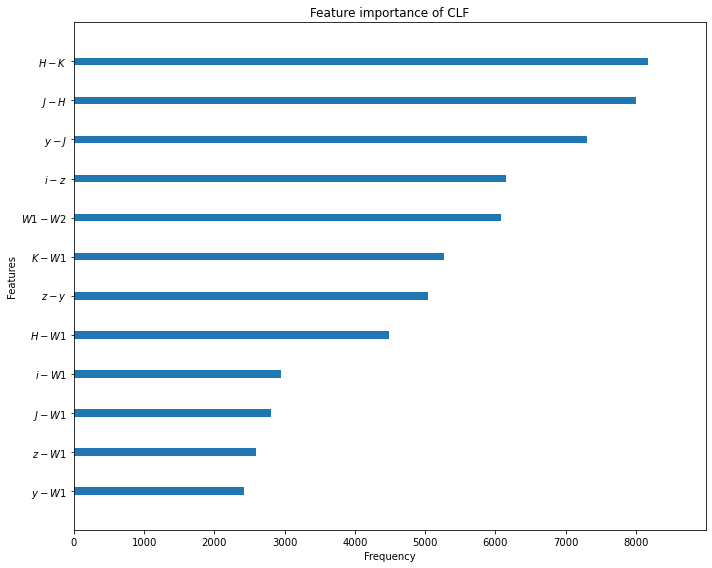

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(clf.get_booster(),
                    ax=ax,
                    show_values=False,
                    xlabel="Frequency")
plt.title("Feature importance of CLF")
# plt.xlim([0,15000])
plt.grid(False)
plt.tight_layout()
plt.savefig("feature_freq_clf2-test5.pdf",dpi=300)

In [26]:
# fig, ax = plt.subplots(figsize=(100, 60))
# xgb.plot_tree(clf.get_booster(), ax=ax, num_trees=0)

In [14]:
clf.get_booster().get_score(importance_type= "gain")

{'$W1-W2$': 783.1991719911007,
 '$y-J$': 51.270133134856685,
 '$J-H$': 11.79191121947869,
 '$H-K$': 11.327072966290455,
 '$i-W1$': 4.9218106403297135,
 '$i-z$': 4.9792722188150815,
 '$J-W1$': 5.544006427672124,
 '$H-W1$': 21.437808238691076,
 '$K-W1$': 4.557615501419551,
 '$z-y$': 4.34987847076918,
 '$y-W1$': 4.482510926824091,
 '$z-W1$': 4.441616002045263}

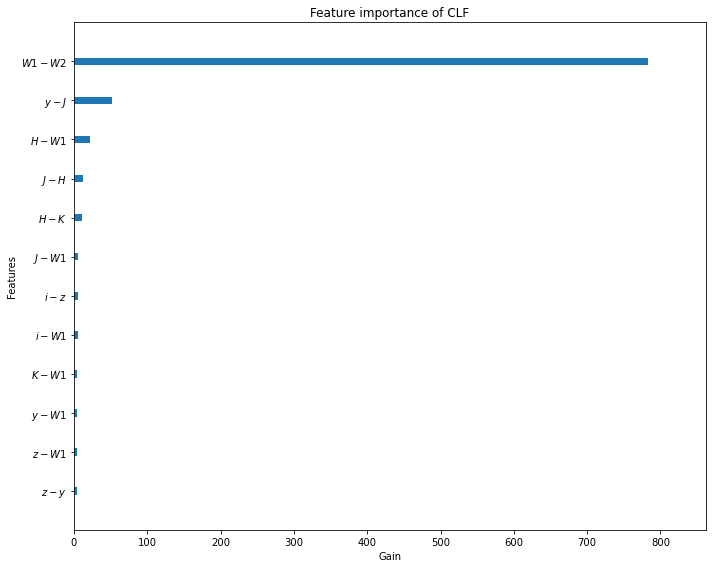

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(clf.get_booster(),
                    ax=ax,
                    importance_type="gain",
                    xlabel="Gain",
                    show_values=False)
plt.title("Feature importance of CLF")
# ax.set_xscale('log')
# ax.set_xlim([0,10000])
plt.grid(False)
plt.tight_layout()
plt.savefig("feature_gain_clf2-test5.pdf",dpi=300)

In [59]:
clf.get_booster().get_fscore()

{'w1-w2': 6074,
 '$y-j$': 7304,
 '$j-h$': 8009,
 '$h-k$': 8176,
 '$i-w1$': 2954,
 '$i-z$': 6152,
 '$j-w1$': 2812,
 '$h-w1$': 4481,
 '$k-w1$': 5271,
 '$z-y$': 5042,
 '$y-w1$': 2424,
 '$z-w1$': 2596}

## 4. confusion matrix

In [60]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [61]:
clf.predict_proba(X_test)

array([[2.6860833e-03, 9.9731392e-01],
       [7.5697899e-05, 9.9992430e-01],
       [9.9790406e-01, 2.0959359e-03],
       ...,
       [9.4500971e-01, 5.4990321e-02],
       [9.9951416e-01, 4.8582105e-04],
       [2.7531385e-04, 9.9972469e-01]], dtype=float32)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
mycm = confusion_matrix(y_test, y_pred)

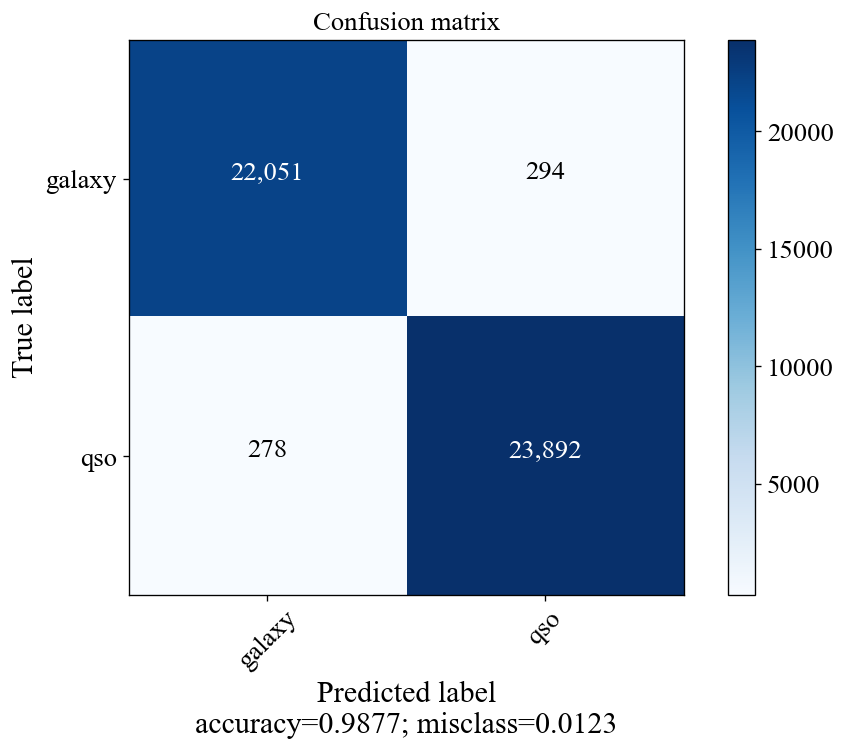

In [64]:
plot_confusion_matrix(mycm,
                      target_names=['galaxy','qso'],
                      normalize=False
                     )